# Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

plt.style.use('fivethirtyeight')



# Loading the dataset and handling the missing values

In [2]:
missing_values = ['N/a', 'na', np.nan]
data = pd.read_csv(r'C:\Users\jaser\Downloads\ds_salaries.csv', na_values=missing_values)

In [3]:
a = data.isnull().sum()
print(a)

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


# Dropping duplicated rows

In [5]:
b = data.duplicated().sum()
print(b)

1171


In [6]:
data = data.drop_duplicates()

In [7]:
data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


# Encoding the categorical columns

In [8]:
cat_columns = ['experience_level', 'employment_type', 'job_title', 'salary_currency', 'employee_residence', 'company_location', 'company_size']

label_encoder = LabelEncoder()
for col in cat_columns:
    data[col] = label_encoder.fit_transform(data[col])

# Heatmap showing correlations

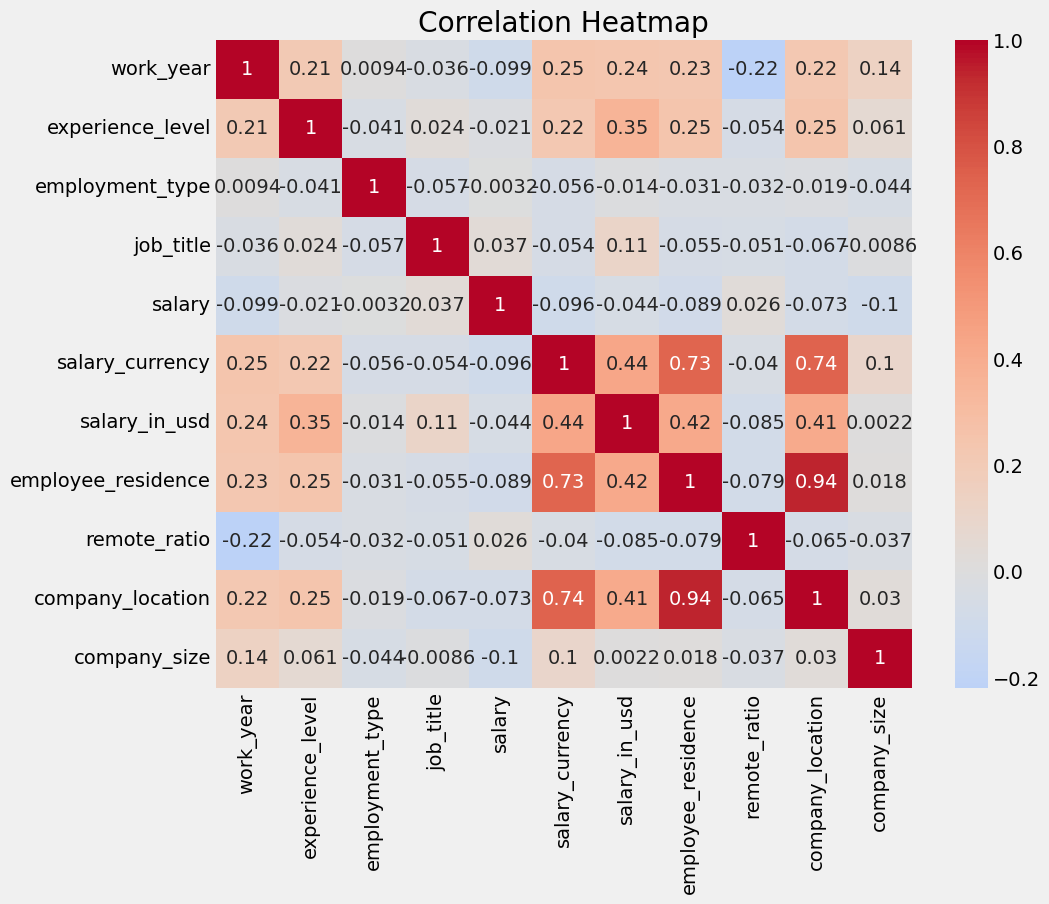

In [9]:
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', center=0) #.corr is where the correlation matrix is calculated between columns
plt.title('Correlation Heatmap')
plt.show()

# Declaring the features and the target

In [10]:
x = data.loc[: ,['work_year', 'employee_residence']] #for multiple columns loc or iloc should
y = data['salary_in_usd']                            #be used


# Splitting the dataset into train test sets

In [11]:
from sklearn.model_selection import train_test_split, GridSearchCV
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

# Scaling the features

In [12]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)

x_test = sc.transform(x_test)

# Training the model using the best available hyperparameters

In [13]:
from sklearn.ensemble import RandomForestRegressor

param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'max_features': ['auto', 'sqrt']
}

regressor = RandomForestRegressor(random_state=0)

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=regressor, param_grid=param_grid, scoring='neg_mean_squared_error')
grid_search.fit(x_train, y_train)

# Get the best hyperparameters and evaluate on test set
best_params = grid_search.best_params_
best_regressor = grid_search.best_estimator_


# Predicting random inputs

In [14]:
categorical_value1 = 'ES'

if categorical_value1 in label_encoder.classes_:
    categorical_encoded1 = label_encoder.transform([categorical_value1])[0]
else:
    categorical_encoded1 = 0  
    
    
new_pred = best_regressor.predict([[2023, categorical_encoded1]]) #predict() excpects a 2D array as input.

print(new_pred)



[77330.02809236]


# Making predictions on the test set

In [15]:
y_pred = best_regressor.predict(x_test)

# Evaluating the performance, mse metrics because of the regressional nature of the problem

In [16]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 3161152802.1535387


# Visual comparison between the predictions and actual values

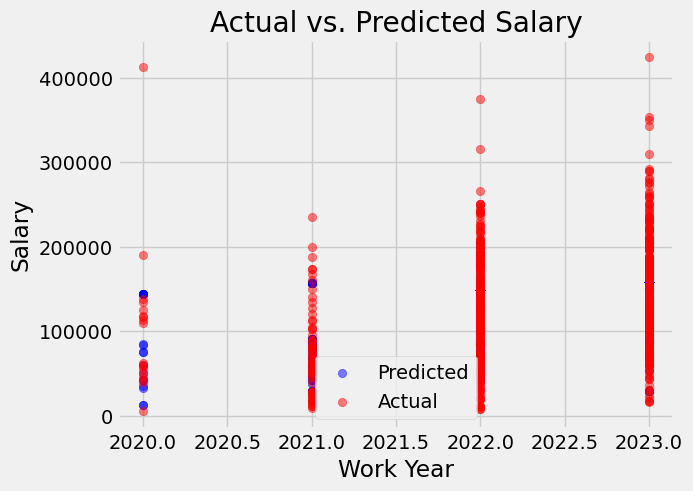

In [17]:
x_test_df = pd.DataFrame(x_test, columns=['work_year', 'employee_residence'])

# Manually apply inverse transformation to the 'work_year' column
x_test_df['work_year'] = (x_test_df['work_year'] * sc.scale_[0]) + sc.mean_[0]

plt.scatter(x_test_df['work_year'], y_pred, color='blue', label='Predicted', alpha=0.5)
plt.scatter(x_test_df['work_year'], y_test, color='red', label='Actual', alpha=0.5)
plt.xlabel('Work Year')
plt.ylabel('Salary')
plt.title('Actual vs. Predicted Salary')
plt.legend()
plt.show()


In [18]:
y_pred.shape

(646,)

In [19]:
y_test.shape

(646,)